$ \nabla f(x) = \begin{bmatrix} $
$\frac{\partial}{\partial x_1} f(x) \$
$\frac{\partial}{\partial x_2} f(x) \$
\vdots \
\frac{\partial}{\partial x_n} f(x)
\end{bmatrix} = \begin{bmatrix}
\sum_{k=0}^{\infty} \frac{1}{(k+1)!} a_{11}((Ax)^{k})1 \
\sum{k=0}^{\infty} \frac{1}{(k+1)!} a_{22}((Ax)^{k})2 \
\vdots \
\sum{k=0}^{\$

In [2]:
import pandas as pd
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm
import statsmodels.api as sm

plt.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'retina'


## Игнашин Игорь Николаевич  , ThunderstormXX

# Poisson regression

In [3]:
# https://datarepository.wolframcloud.com/resources/Prussian-Horse-Kick-Data
# The data give the number of soldiers in the Prussian cavalry killed by horse kicks, by corp membership and by year.

df = pd.read_csv("Prussian-Horse-Kick-Data.csv")
df

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
0,"DateObject[{1875}, ""Year"", ""Gregorian"", -5.]",0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,"DateObject[{1876}, ""Year"", ""Gregorian"", -5.]",2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,"DateObject[{1877}, ""Year"", ""Gregorian"", -5.]",2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,"DateObject[{1878}, ""Year"", ""Gregorian"", -5.]",1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,"DateObject[{1879}, ""Year"", ""Gregorian"", -5.]",0,0,0,1,1,2,2,0,1,0,0,2,1,0
5,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]",0,3,2,1,1,1,0,0,0,2,1,4,3,0
6,"DateObject[{1881}, ""Year"", ""Gregorian"", -5.]",1,0,0,2,1,0,0,1,0,1,0,0,0,0
7,"DateObject[{1882}, ""Year"", ""Gregorian"", -5.]",1,2,0,0,0,0,1,0,1,1,2,1,4,1
8,"DateObject[{1883}, ""Year"", ""Gregorian"", -5.]",0,0,1,2,0,1,2,1,0,1,0,3,0,0
9,"DateObject[{1884}, ""Year"", ""Gregorian"", -5.]",3,0,1,0,0,0,0,1,0,0,2,0,1,1


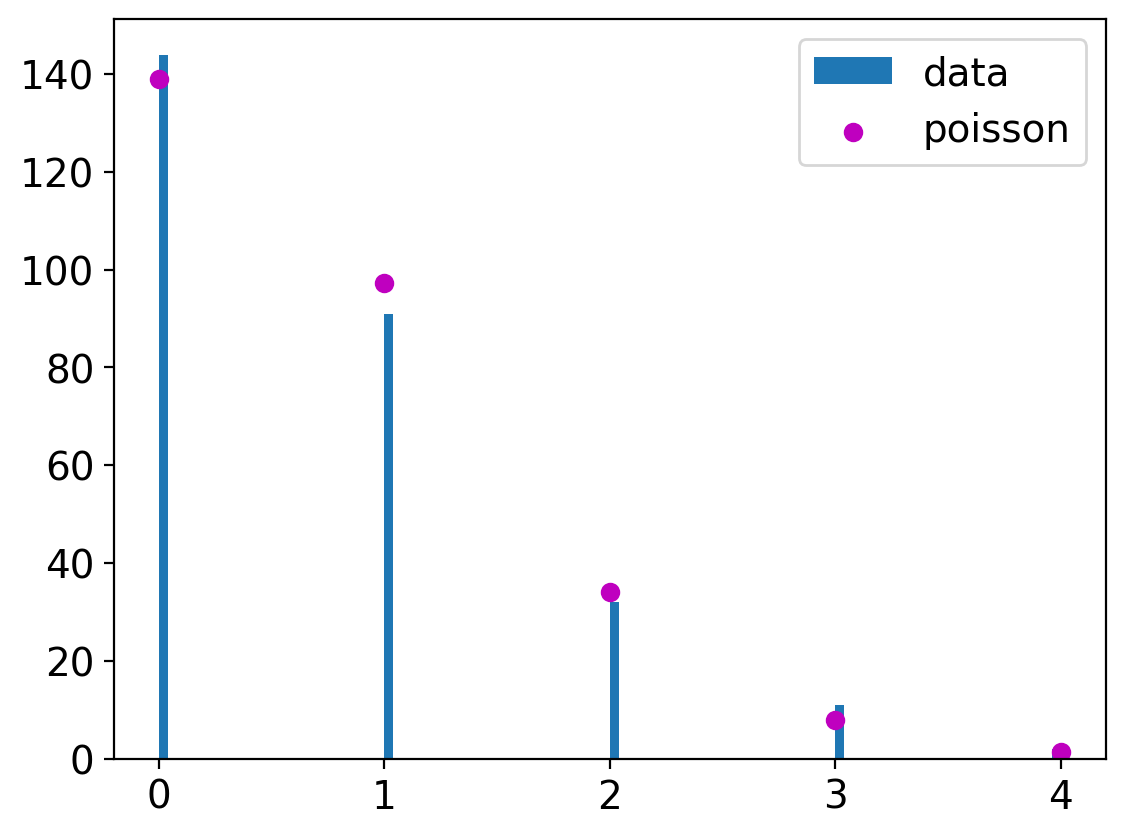

In [4]:
series = df.iloc[:, 1:].values.flatten()

plt.hist(series, bins=100, label="data")
x = np.arange(5)
plt.scatter(x, poisson.pmf(x, series.mean()) * series.size, color='m', label="poisson")
plt.legend()
plt.show()

# Predicting number of students awards

In [5]:
#  https://search.r-project.org/CRAN/refmans/gorica/html/academic_awards.html
df = pd.read_csv("StudentData.csv")


<AxesSubplot: >

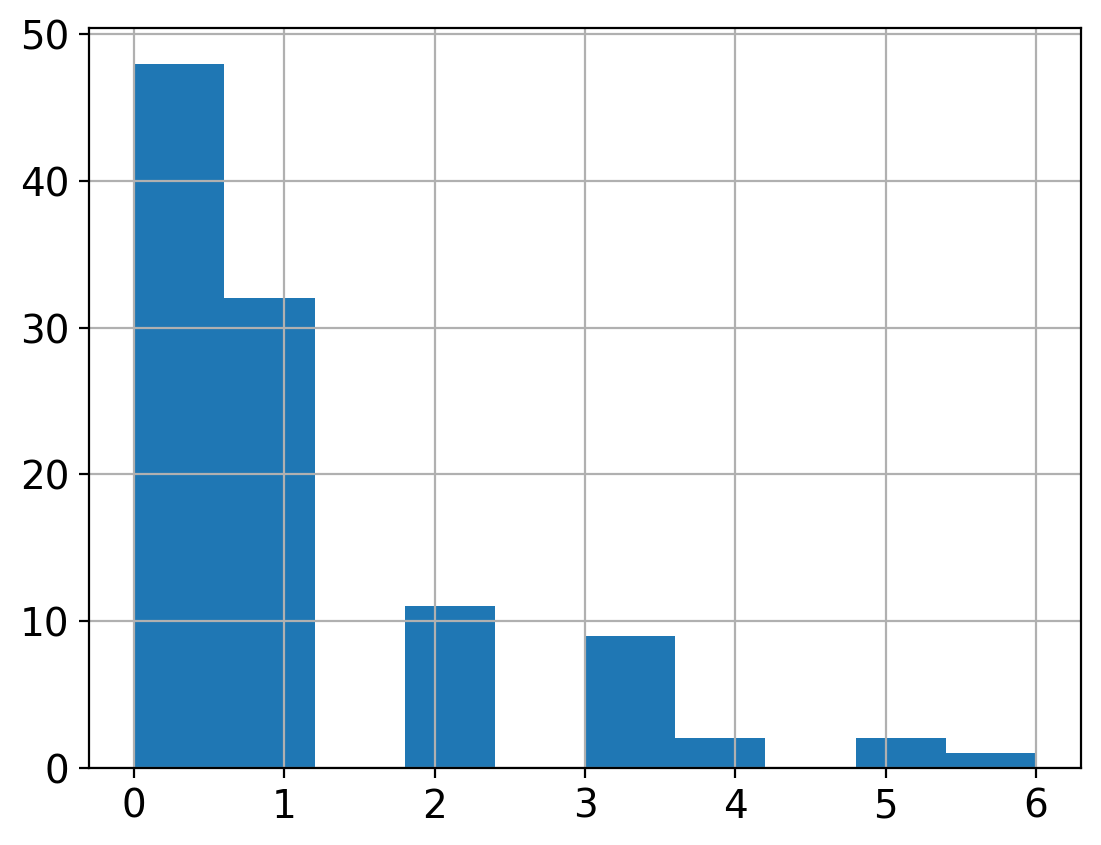

In [6]:
df[df.prog == 2].num_awards.hist()

In [7]:
df_dummy = pd.get_dummies(df, columns=["prog"])
df_dummy

,id,num_awards,math,prog_1,prog_2,prog_3
0,45,0,41,0,0,1
1,108,0,41,1,0,0
2,15,0,44,0,0,1
3,67,0,42,0,0,1
4,153,0,40,0,0,1
...,...,...,...,...,...,...
195,100,2,71,0,1,0
196,143,2,75,0,0,1
197,68,1,71,0,1,0
198,57,0,72,0,1,0


## Simply use statsmodels

In [8]:
Y = df_dummy["num_awards"].values
X = sm.tools.add_constant(df_dummy[["math", "prog_1", "prog_2", "prog_3"]].values)
fit_res = sm.Poisson(Y, X).fit()
fit_res.summary()


Optimization terminated successfully.
         Current function value: 0.913761
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.2118
Time:                        22:18:51   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6882        nan        nan        nan         nan         nan
x1             0.0702      0.011      6.619      0.000       0.049       0.091
x2            -1.5589        nan        nan        nan         nan         nan
x3            -0.4751        nan        nan        nan         nan         nan
x4            -1.1891        nan        nan        nan         nan         nan
==============================================================================
"""

<class 'numpy.ndarray'>


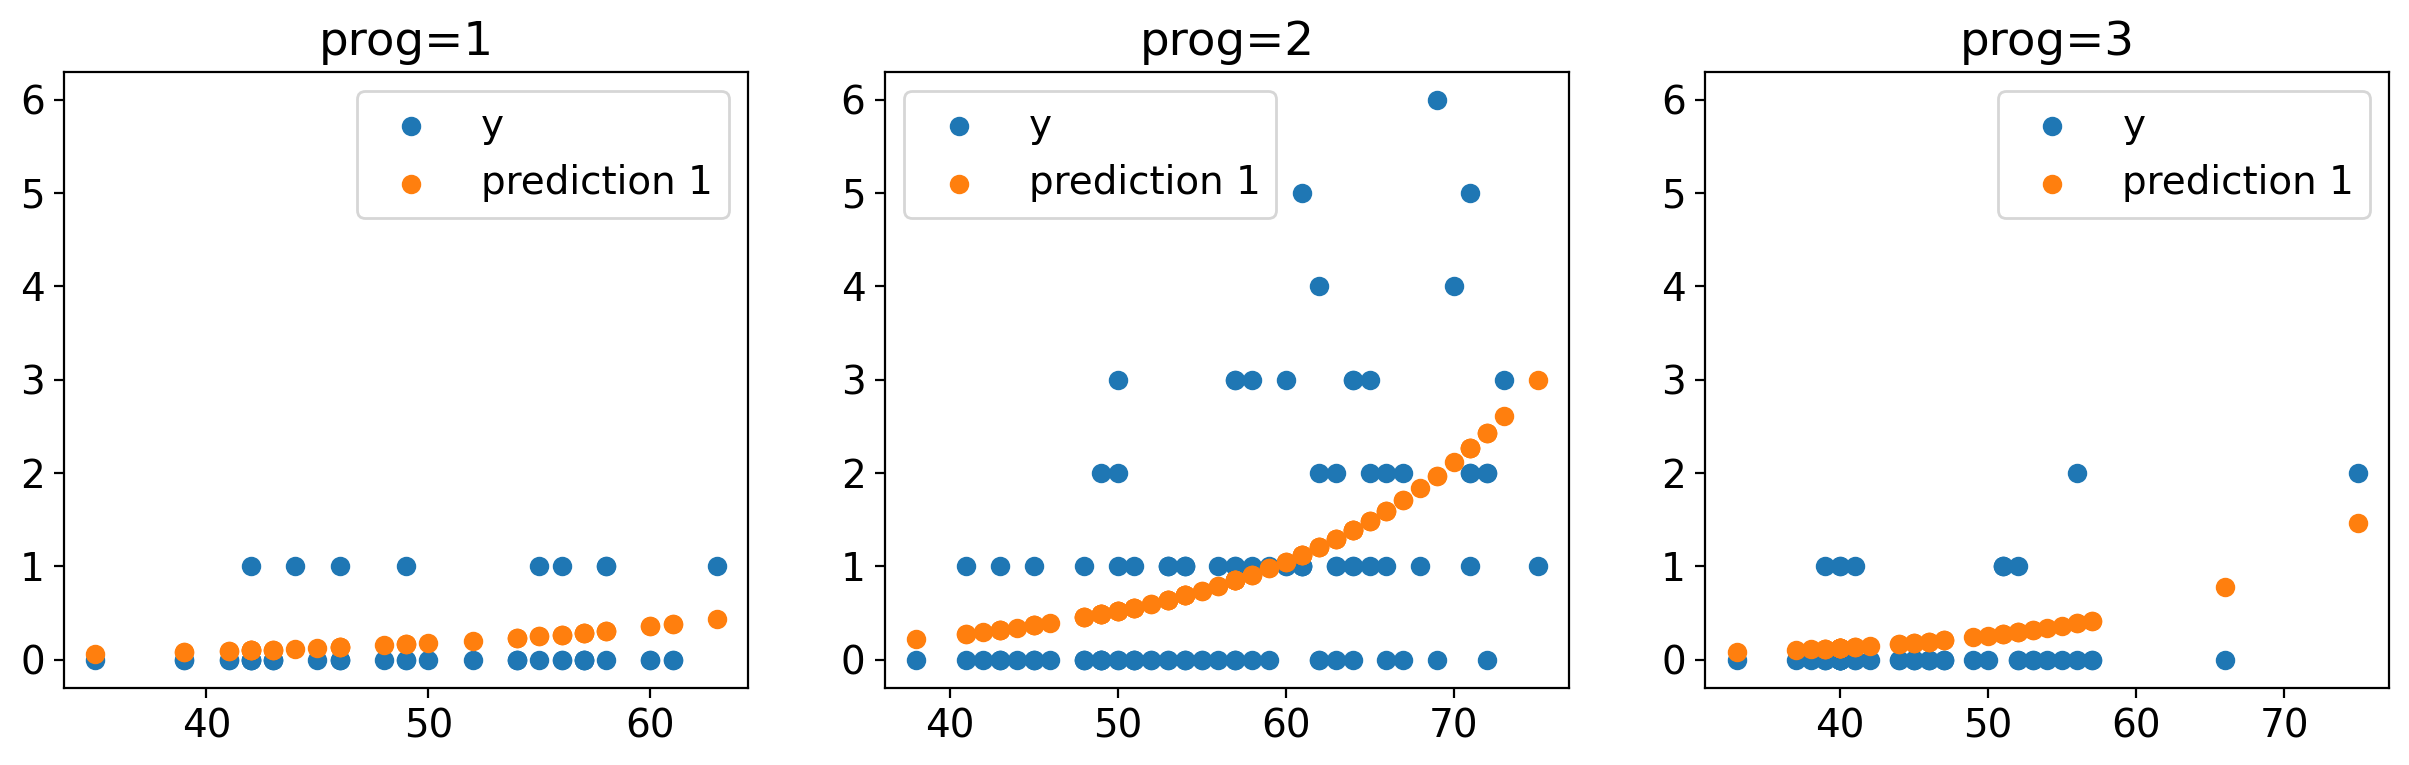

In [177]:
sm_pred = fit_res.predict(X)
print(type(sm_pred))
def plot(*preds):
    plt.figure(figsize=(15, 4))
    ax = None
    for prog in [1, 2, 3]:
        ax = plt.subplot(130 + prog, sharey=ax)
        inds = df.prog == prog 
        plt.scatter(df.math[inds], Y[inds], label='y')
        for i, pred in enumerate(preds):
            plt.scatter(df.math[inds], pred[inds], label=f'prediction {i + 1}')
        plt.title(f"prog={prog}")
        plt.legend()
        
plot(sm_pred)

### 1. Exponential family
$$p(y, \lambda) = \frac{e^{-\lambda} \lambda^y}{y!}$$

$$b(y) exp\left(\eta^T T(y) - a(\eta)\right)$$ 
    
<!-- <font color='red'>Show that the Poisson distribution is in the exponential family.</font> -->
Poisson distribution is in the exponential family:
$$\frac{1}{y!} \exp(-y + y \ln \lambda) = \frac{1}{y!} \exp(\eta y - e^\eta)$$

The connection between $\eta$ and $\lambda$ is  $\ln \lambda = \eta$ 

<!-- The connection between $\eta$ and $\lambda$ is:  $\color{red}{?}$  -->

### 2. Decision function 
$$h_\theta(x) = \mathbb E[y | x] = \lambda = e^{\eta} = e^{\theta^\top x}$$

### 3. Objective function / maximize log likelihood 
The loss function for the Poisson regression is
$$f(\theta) = \sum_k \left(e^{x_k^\top \theta} - y_k x_k^\top \theta \right)$$




# Problem 1. (1.5) Gradient

Denoting $X = \begin{pmatrix}x_1^\top \\ \vdots \\ x_n^\top \end{pmatrix}$  the matrix, which rows is our inputs $x_k$ (this is how a bunch of vectors is usually represented in `numpy`), and $Y=\begin{pmatrix}y_1 \\ \vdots \\ y_n \end{pmatrix}$ the vector of outputs, we can rewrite $f$ in the matrix form (so that $f$ could be calculated efficiently with `numpy`'s backend without in-python loops)
$$f(\theta) = \mathbf 1^\top \left(\exp(X\theta) - Y \odot X \theta \right),$$
there $\odot$ denotes componentwise multiplication, and $\exp$ is also elementwise.

- Find the gradient of the loss $\nabla f(\theta)$ and write it **in the matrix form** in the cell below.

# Solution

$df$/$d\theta_j = \sum( e^{x_k^T\theta}x_{kj} - y_kx_{kj}  ) => gradf=  X^T(e^{X\theta} - Y)  $

In [109]:
# and here 
def f(theta: np.ndarray):
    return (np.exp(X @ theta) - np.diag(Y)@(X @ theta)).sum() 
def gradf(theta: np.ndarray):
    return np.transpose(X)@(np.exp(X@theta) -  Y)

#Чекаем правильность
theta = np.array([1e-2,1e-2,1e-2,1e-2,1e-2])
d_theta = np.array([2e-6,3e-5,4e-6,3e-5,1e-5])
print("df = ", f(theta+ d_theta)-f(theta) )
print("gradf*delta = ",gradf(theta)@d_theta )


df =  0.33329776162293
gradf*delta =  0.3328235365118409


# Problem 2. (1) Gradient Descent
Probably, the simpliest optimization method is the gradient descent with the constant step-size $h$:
$$\theta^{i+1} = \theta^i - h \nabla f(\theta^i).$$

- Implement this algorithm, using the draft below.

- If staring point $\theta^{0}$ is set to $\vec 0$, what is the maximum step-size value $h$, with which the method still could be called a "descent", i.e. $f(\theta^i)$ monotonously decreases? Use f"{h:.0e}" format for the answer.



148.85556997598243 [-1.33403077 -1.42103596 -1.28283289 -1.31696481 -1.35109673 -1.40397
 -1.24870098 -1.35109673 -1.47055843 -1.24870098 -1.35109673 -0.30290739
 -1.28283289 -1.4022946  -1.35109673 -1.45516787 -1.38690404 -1.38522864
 -0.18344568 -1.36816268 -1.40397    -1.26576694 -1.35109673 -1.35109673
 -0.2175776  -0.11518185 -1.36983808 -1.33570617 -0.16637972 -0.25170951
 -1.40397    -1.23163502 -0.2175776  -0.11518185 -1.35109673 -1.36816268
 -1.19750311 -0.23464356 -1.38690404 -0.25170951 -1.14798063 -0.09811589
 -0.20051164 -1.36816268 -0.06398398 -1.33403077 -1.36816268 -1.45516787
 -1.14630523 -0.13224781 -0.18344568 -1.35109673 -1.33570617 -0.09811589
 -0.2175776  -1.38690404 -0.02985206 -1.40397    -1.26576694 -1.19917851
 -1.23163502 -0.18344568 -0.2175776  -1.35109673 -1.14630523 -1.14630523
 -1.35277213 -0.11518185 -0.04691802 -1.19917851 -0.09811589 -0.13224781
 -0.08104994 -1.42103596 -1.16337119 -1.33570617 -1.09510736 -1.33570617
 -1.0797168  -0.18344568 -1.1121733

Text(0.5, 0, 'iter')

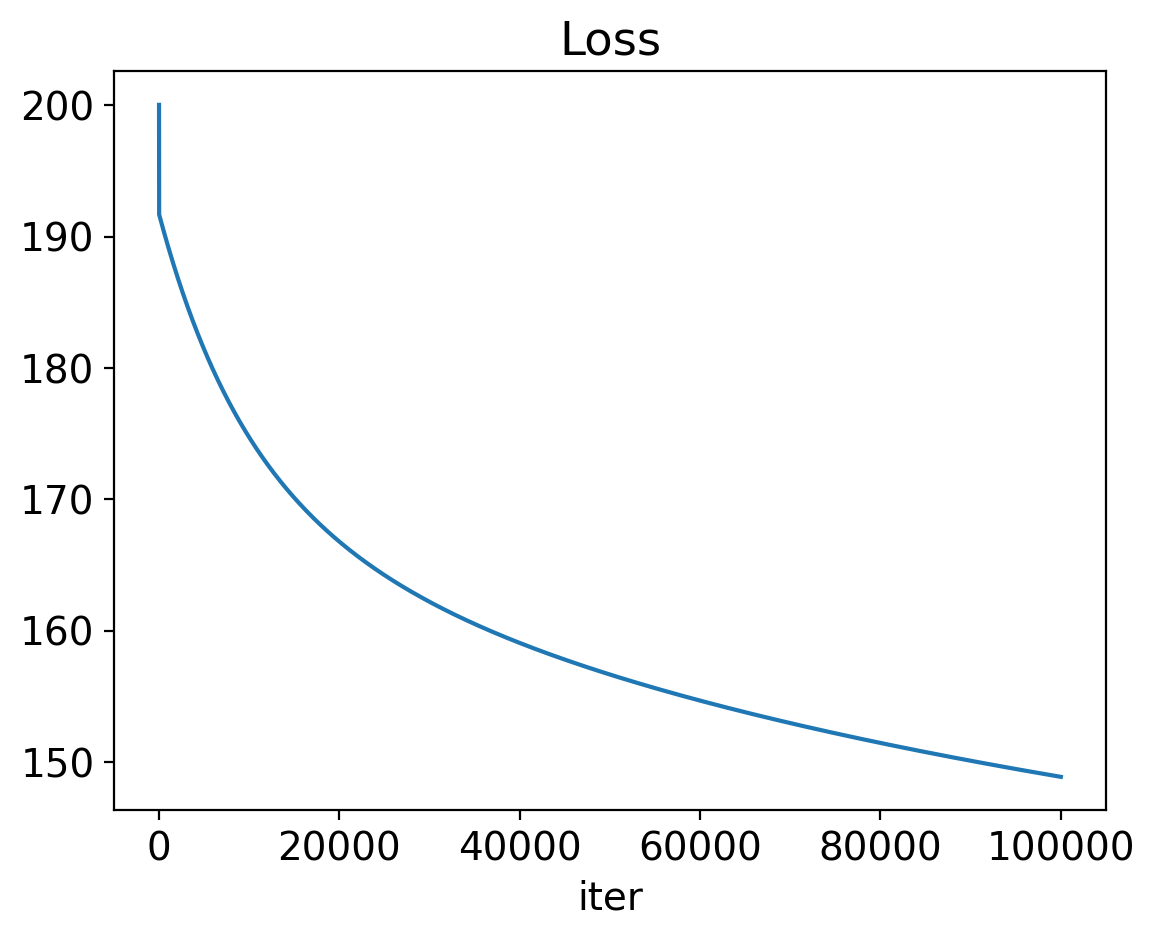

In [190]:
dim = X.shape[1] 
theta = np.ones(dim)*1e-5
# theta = theta*1e-2
niters = 100000 # ?
h = 1e-6
flog = []
for i in range(niters):
    flog.append(f(theta))
    theta = theta - h*gradf(theta)
print(flog[-1] , X@theta)
    
plt.plot(flog)
plt.title("Loss")
plt.xlabel("iter")


In [169]:
# maximum h
print("h = 10^-33 , Порядка значения градиента нашей функции в нуле")

h = 10^-33 , Порядка значения градиента нашей функции в нуле


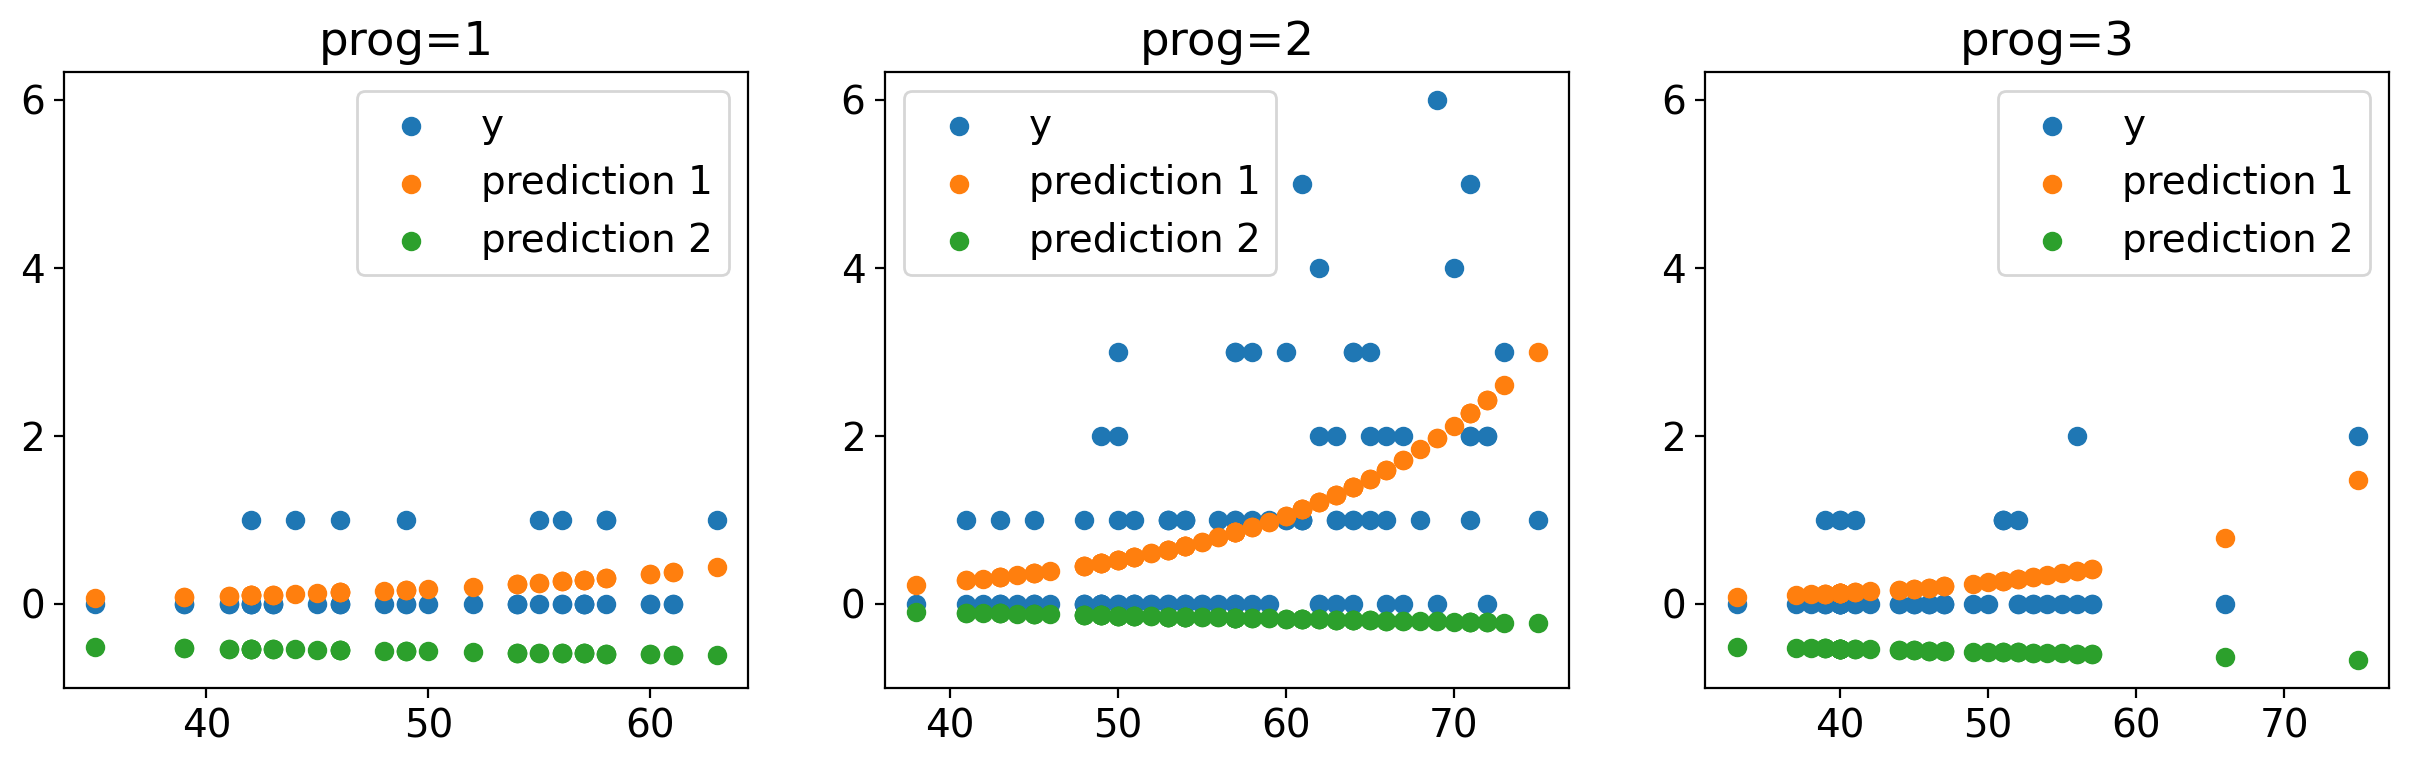

In [206]:
def predict(x, theta):
    dim = x.shape[1] 
    theta = np.ones(dim)*1e-5
    niters = 10000 # ?
    h = 1e-6
    flog = []
    for i in range(niters):
        flog.append(f(theta))
        theta = theta - h*gradf(theta)
    return X@theta
# print(predict(X,theta))
theta = np.ones(dim)*1e-4
plot(sm_pred, predict(X, theta))
# plot(sm_pred)
# plot(sm_pred, )

# plot(sm_pred)
# print(sm_pred.shape)

# Problem 3. (1.5+1) Hessian
- 3.1 (1.5) Find $\nabla^2 f(\theta)$ and write it in the matrix form. 

- 3.1 (1) If $Ker X = 0$, is it true that $\nabla^2 f(\theta) > 0$ ?


# Solution
1) $df/d^2\theta_i\theta_j  = \sum e^{x_k^T\theta}x_{kj}x_{ki} = X^Tdiag(e^{X\theta})X   $

2) Да , $h^TX^Tdiag(e^{X\theta})Xh >= h^TX^TXh * min_k(e^{x_k^T\theta}) > 0$

In [168]:
# and here
def hessf(theta: np.ndarray):
    return np.transpose(X)@np.diag(np.exp(X@theta))@X


# Problem 4. (1.5) Newton's method
Another classical optimization method is the Newton's method:
$$\theta^{k+1} = \theta^{k} - [\nabla^2 f(\theta^k)]^{-1} \nabla f(\theta^k)$$

- Implement the method. 

- Describe its behaviour on our optimization problem. Try different starting points $\theta^0$.



135.10516063788072


Text(0.5, 0, 'iter')

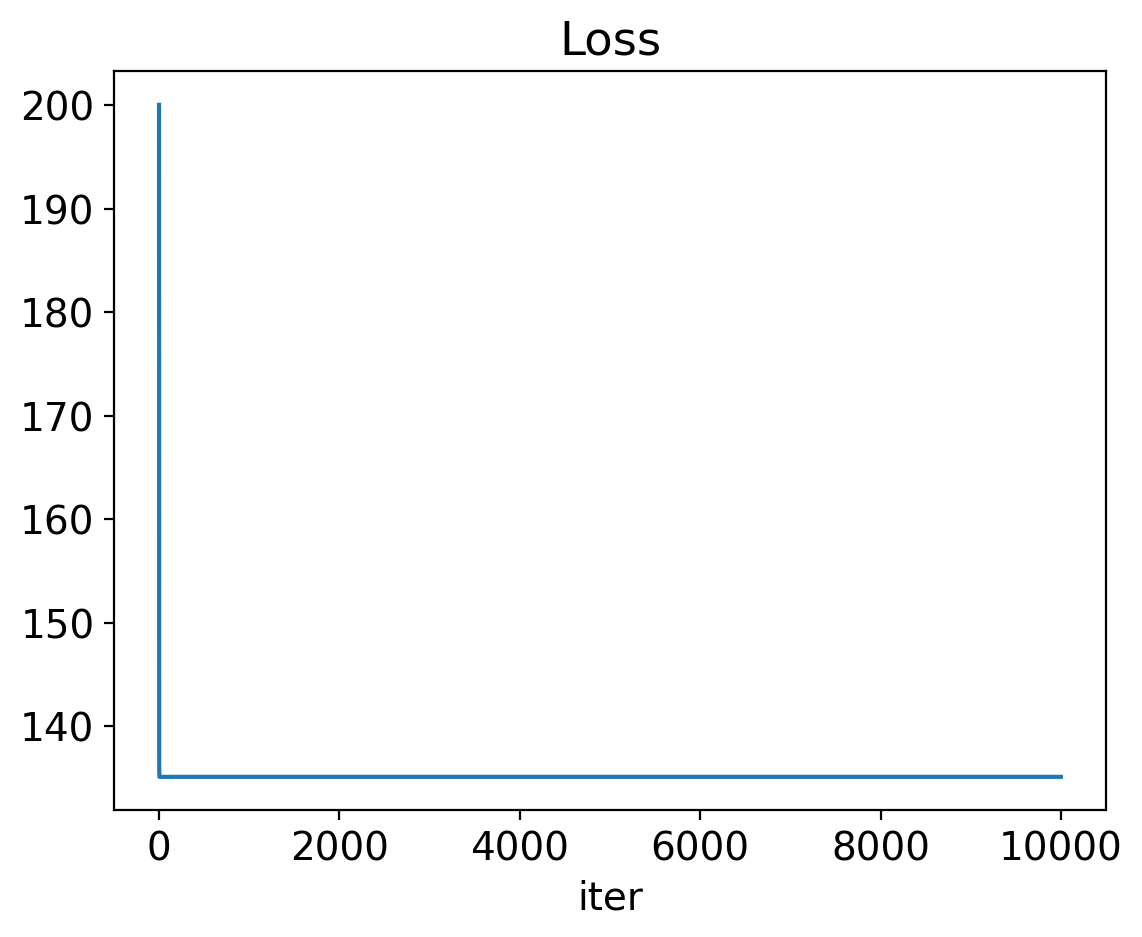

In [201]:
dim = X.shape[1] 
theta = np.ones(dim)*1e-5

niters = 10000 # ?
flog = []
for i in range(niters):
    flog.append(f(theta))
    theta = theta - np.linalg.pinv(hessf(theta))@gradf(theta)
print(flog[-1])
    
plt.plot(flog)
plt.title("Loss")
plt.xlabel("iter")

and here

# Problem 5. (1) Damped Newton's method 

Damped Newton's method is a modification of the original one with introduced step-sizes $h^k > 0$:
$$\theta^{k+1} = \theta^{k} - \color{red}{h^k} [\nabla^2 f(\theta^k)]^{-1} \nabla f(\theta^k)$$

Common-used strategy for choosing step-size is the Armijo rule. Armijo rule applies for the methods of the following form:
$$\theta^{k+1} = \theta^k - h^k g^k.$$
Armijo rule (backtracking linesearch) is the following algorithm:
1. Set $h^k = h_0$
2. While $f(\theta^k - h^k g^k) > f(\theta^k) - \alpha h^k (g^k)^\top \nabla f(\theta^k)$ do $h^k = h^k \cdot \rho$.

Here $\alpha \geq 0$ and $0 < \rho < 1$ are hyperparameters. Usually $\alpha \leq 0.3$.

- Show that Armijo rule is correctly defined for damped Newton's method applied to smooth $f$, i.e. while-loop terminates with some $h^k > 0$

- Implement damped Newton's method. How much worse (roughly) arithmetic complexity of its iteration comparing to classical Newton's method?

# Solution
here

C:\Users\user\AppData\Local\Temp\ipykernel_11300\919564761.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(X @ theta) - np.diag(Y)@(X @ theta)).sum()


135.10516063788066


Text(0.5, 0, 'iter')

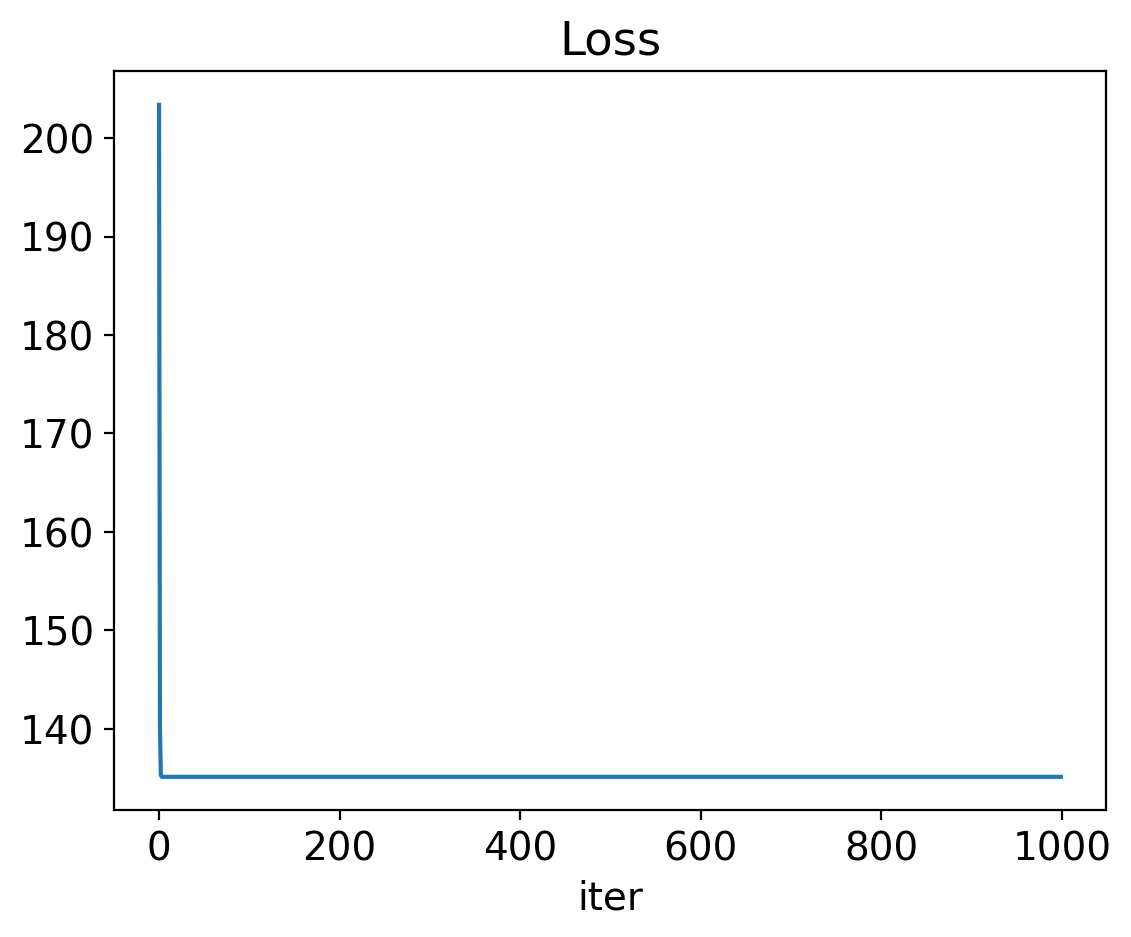

In [205]:
dim = X.shape[1] 
theta = np.ones(dim)*1e-3
h = 1e3
a = 0.2
p = 0.5
niters = 1000 # ?
flog = []
for i in range(niters):
    flog.append(f(theta))
    g = np.linalg.pinv(hessf(theta))@gradf(theta)
    while f(theta - h*g) > f(theta) - a*h*np.dot(g,gradf(theta)) :
        h = h*p
    theta = theta - h*g

print(flog[-1])
    
plt.plot(flog)
plt.title("Loss")
plt.xlabel("iter")

# Problem 6*. (3) Speedup

- Suggest (it's possible you've done it already in problems 4-5) the way to recalculate $g^k$ with $O(n^2)$  arithmetic complexity (matrix $X \in \mathbb R^{O(n) \times O(n)}$), meaning that the first iteration can have the complexity up to $O(n^3)$, and all the rest are $O(n^2)$.
- Implement it

# Solution


In [ ]:
# and here

# Problem 7 (2) (offtop about GD). 

Упр 1.2 пособия: покажите, что если для минимизации положительно определённой квадратичной формы $f(x)=\frac{1}{2}\langle A x, x\rangle-\langle b, x\rangle \rightarrow \min _{x \in \mathbb{R}^n}$ использовать градиентный спуск с $h^k=1 / \lambda_{k+1}$ где $\lambda_{k+1}-(k+1)$-е собственное значение матрицы $A\left(0<\mu=\lambda_1 \leqslant \ldots \leqslant \lambda_n=L\right)$, то независимо от точки старта метод будет конечен: $x^n=x_*$, где $A x_*=b$. 


# Problem 8 (2) (offtop about GD 2)

Покажите, что в случае вырожденной квадратичной функции $f(x) = \frac12 \langle Ax, x\rangle - \langle b, x\rangle, \; \mu = 0$ градиентный спуск линейно сходится ко множеству $\{x: Ax - b \in \text{Ker } A\}$. Сходится ли GD на такой задаче в обычном смысле этого слова? Вспомните о том, что когда функция не сильно выпукла на всей области определения, она всё ещё может быть сильно выпукла на некотором подмножестве/подпространстве.

# Solution 
